In [1]:
import crocoddyl
import numpy as np


In [2]:
# Defining model and cost weights
model = crocoddyl.ActionModelUnicycle()
data = model.createData()

# Cost function is defined here -> https://github.com/loco-3d/crocoddyl/blob/3cd866def6cbeb8d35a69cbbe5accc0ec5d0ca20/include/crocoddyl/core/actions/unicycle.hxx#L20
model.costWeights = np.array([
    1,   # state weight
    1,   # control weight
])

# Defining problem
T  = 20
x0 = np.array([-1,-1,1])

problem = crocoddyl.ShootingProblem(x0, [ model ] * T, model)
# problem.terminalModel = model_term

# Applying initial control sequence
us = [ np.array([1., .1]).T for _ in range(T)]
xs = problem.rollout(us)

In [3]:
data.cost

0.0

(np.float64(-3.0), np.float64(1.0), np.float64(-2.0), np.float64(10.0))

<Figure size 640x480 with 0 Axes>

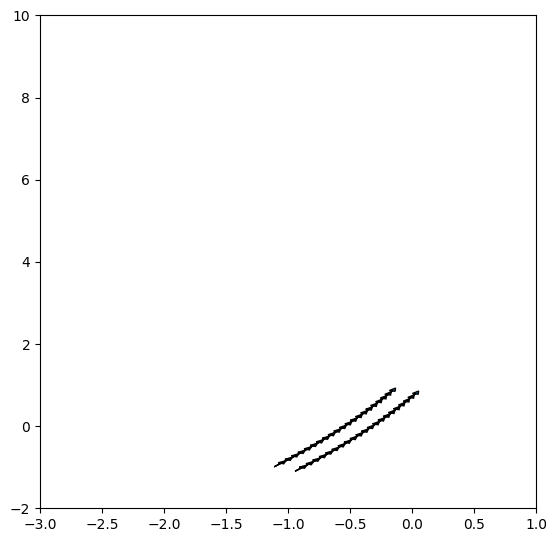

In [4]:
import matplotlib.pylab as plt
from tp7.unicycle_utils import plotUnicycleSolution
plt.figure()
plotUnicycleSolution(xs)
plt.axis([-3,1.,-2.,10])

In [9]:
# Defining model and cost weights
model = crocoddyl.ActionModelUnicycle()
data = model.createData()

T  = 20
x0 = np.array([-1,-1,1])
us = [ np.array([1., .1]).T for _ in range(T)]
        
X_trajectory = [x0]
current_x = x0
total_cost = 0.0

for t in range(T):
    u_t = us[t]
    model.calc(data, current_x, u_t)
    next_x = data.xnext
    cost_t = data.cost 
    X_trajectory.append(next_x.copy())
    # total_cost += cost_t
    current_x = next_x

In [10]:
xs.tolist()

[array([-1., -1.,  1.]),
 array([-0.94596977, -0.9158529 ,  1.01      ]),
 array([-0.8927837 , -0.83116972,  1.02      ]),
 array([-0.8404471 , -0.74595891,  1.03      ]),
 array([-0.78896522, -0.66022902,  1.04      ]),
 array([-0.73834319, -0.57398859,  1.05      ]),
 array([-0.68858609, -0.48724627,  1.06      ]),
 array([-0.63969888, -0.40001072,  1.07      ]),
 array([-0.59168646, -0.31229067,  1.08      ]),
 array([-0.54455362, -0.22409489,  1.09      ]),
 array([-0.49830508, -0.1354322 ,  1.1       ]),
 array([-0.45294547, -0.04631146,  1.11      ]),
 array([-0.40847932,  0.0432584 ,  1.12      ]),
 array([-0.36491107,  0.13326845,  1.13      ]),
 array([-0.32224509,  0.22370967,  1.14      ]),
 array([-0.28048564,  0.31457302,  1.15      ]),
 array([-0.2396369 ,  0.40584941,  1.16      ]),
 array([-0.19970295,  0.49752972,  1.17      ]),
 array([-0.16068778,  0.58960478,  1.18      ]),
 array([-0.1225953 ,  0.68206538,  1.19      ]),
 array([-0.08542931,  0.77490228,  1.2      

In [11]:
X_trajectory

[array([-1, -1,  1]),
 array([-0.94596977, -0.9158529 ,  1.01      ]),
 array([-0.8927837 , -0.83116972,  1.02      ]),
 array([-0.8404471 , -0.74595891,  1.03      ]),
 array([-0.78896522, -0.66022902,  1.04      ]),
 array([-0.73834319, -0.57398859,  1.05      ]),
 array([-0.68858609, -0.48724627,  1.06      ]),
 array([-0.63969888, -0.40001072,  1.07      ]),
 array([-0.59168646, -0.31229067,  1.08      ]),
 array([-0.54455362, -0.22409489,  1.09      ]),
 array([-0.49830508, -0.1354322 ,  1.1       ]),
 array([-0.45294547, -0.04631146,  1.11      ]),
 array([-0.40847932,  0.0432584 ,  1.12      ]),
 array([-0.36491107,  0.13326845,  1.13      ]),
 array([-0.32224509,  0.22370967,  1.14      ]),
 array([-0.28048564,  0.31457302,  1.15      ]),
 array([-0.2396369 ,  0.40584941,  1.16      ]),
 array([-0.19970295,  0.49752972,  1.17      ]),
 array([-0.16068778,  0.58960478,  1.18      ]),
 array([-0.1225953 ,  0.68206538,  1.19      ]),
 array([-0.08542931,  0.77490228,  1.2       ])

In [8]:
data.cost

95.32213968417628